<a href="https://colab.research.google.com/github/jpmitchell38/PitchClassifierMLB/blob/main/pitch_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/ColabFiles/2019_pitches.csv')
print(df1.head())

     px    pz  start_speed  end_speed    spin_rate     spin_dir  break_angle  \
0  0.00  2.15         88.8       80.7  placeholder  placeholder         22.8   
1  0.34  2.31         89.9       81.8  placeholder  placeholder         22.8   
2 -0.05  2.03         85.7       79.6  placeholder  placeholder          9.6   
3  0.49  0.92         85.4       78.5  placeholder  placeholder         24.0   
4 -0.13  1.11         84.6       77.6  placeholder  placeholder         26.4   

   break_length  break_y     ax  ...  event_num  b_score         ab_id  \
0           4.8     24.0  -8.47  ...          5      0.0  2.019000e+09   
1           3.6     24.0  -7.10  ...          8      0.0  2.019000e+09   
2           6.0     24.0   3.65  ...          9      0.0  2.019000e+09   
3           7.2     24.0 -13.77  ...         10      0.0  2.019000e+09   
4           8.4     24.0 -15.99  ...         11      0.0  2.019000e+09   

   b_count s_count  outs  pitch_num  on_1b  on_2b  on_3b  
0      0.0     

In [ ]:
df1.columns

Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b'],
      dtype='object')

In [ ]:
# List of columns to drop
drop_columns = [
    'type_confidence', 'nasty', 'code', 'event_num', 'b_score',
    'ab_id', 'b_count', 's_count', 'outs', 'pitch_num',
    'on_1b', 'on_2b', 'on_3b', 'type', 'zone'
]

# Drop them from the DataFrame
df1_cleaned = df1.drop(columns=drop_columns)

In [ ]:
df1_cleaned.columns
# df1_cleaned.head()

Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0', 'z0', 'pfx_x',
       'pfx_z', 'pitch_type'],
      dtype='object')

In [ ]:
df1_cleaned.replace('placeholder', np.nan, inplace=True)

df1_cleaned['px'] = pd.to_numeric(df1_cleaned['px'], errors='coerce')
df1_cleaned['pz'] = pd.to_numeric(df1_cleaned['pz'], errors='coerce')
df1_cleaned['start_speed'] = pd.to_numeric(df1_cleaned['start_speed'], errors='coerce')
df1_cleaned['end_speed'] = pd.to_numeric(df1_cleaned['end_speed'], errors='coerce')

df1_cleaned.dropna(subset=['pitch_type'], inplace=True)
df1_cleaned = df1_cleaned[~df1_cleaned['pitch_type'].isin(['EP', 'FO'])]
df1_cleaned = df1_cleaned.dropna(subset=['x', 'y'])

# df1_cleaned.head()

<ipython-input-7-260454c9f59f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1_cleaned.replace('placeholder', np.nan, inplace=True)


In [ ]:
df1_cleaned.pitch_type.value_counts()

,count
pitch_type,
FF,260698
SL,127345
CH,79816
CU,63911
FT,60802
SI,55148
FC,46200
KC,15283
FS,10507


In [ ]:
# print(df1_cleaned.isnull().sum())

# df1_cleaned['spin_dir'] = np.degrees(np.arctan2(df1_cleaned['pfx_z'], df1_cleaned['pfx_x']))
# df1_cleaned = df1_cleaned.drop(columns=['spin_rate'])


df1_cleaned = df1_cleaned.drop(columns=['spin_rate', 'spin_dir'])

In [ ]:
X = df1_cleaned.drop('pitch_type', axis=1)
y = df1_cleaned['pitch_type']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=25, random_state=42)

# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8408
Classification Report:
              precision    recall  f1-score   support

          CH       0.86      0.92      0.89     16052
          CU       0.82      0.85      0.83     12677
          FC       0.75      0.64      0.69      9335
          FF       0.92      0.96      0.94     52473
          FS       0.76      0.35      0.48      2082
          FT       0.67      0.66      0.66     11941
          KC       0.79      0.49      0.60      3096
          KN       0.88      0.49      0.63        43
          SI       0.73      0.61      0.66     10992
          SL       0.82      0.89      0.86     25291

    accuracy                           0.84    143982
   macro avg       0.80      0.68      0.72    143982
weighted avg       0.84      0.84      0.84    143982



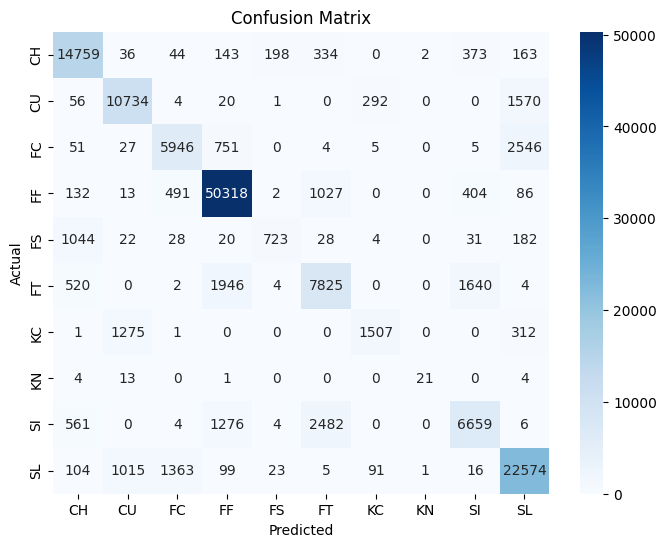

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-15-375e7737e506>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Pitch Type', data=accuracy_df, palette='Blues_d')


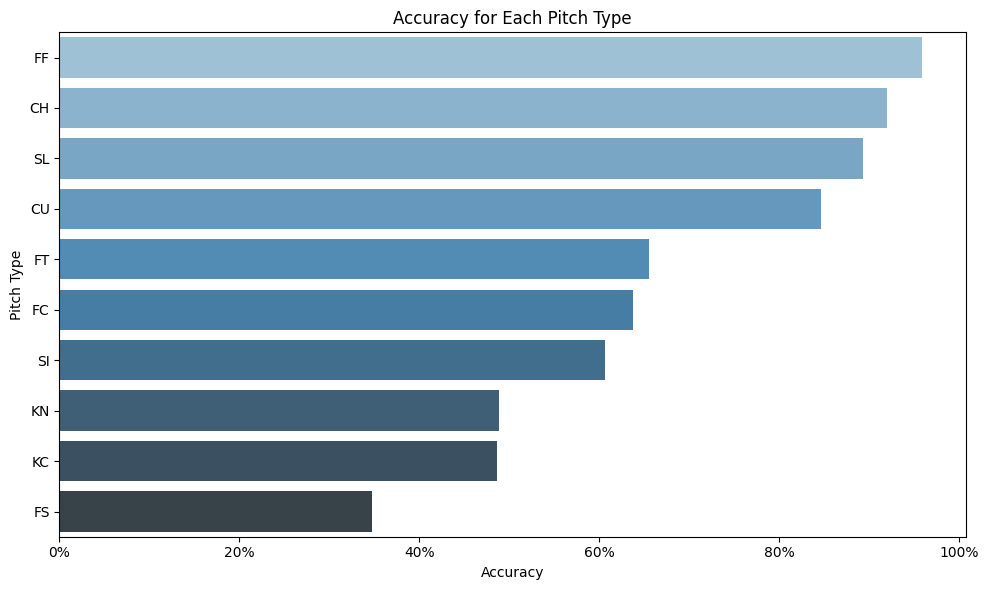

In [ ]:
# Get the unique pitch types
pitch_types = df1_cleaned['pitch_type'].unique()

# Calculate accuracy for each pitch type
accuracies = []

for pitch in pitch_types:
    pitch_indices = y_test == pitch
    accuracy = accuracy_score(y_test[pitch_indices], y_pred[pitch_indices])
    accuracies.append(accuracy)

# Create a DataFrame for plotting
accuracy_df = pd.DataFrame({
    'Pitch Type': pitch_types,
    'Accuracy': accuracies
})

# Sort the accuracy values in descending order
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Pitch Type', data=accuracy_df, palette='Blues_d')

# Format the x-axis labels as percentages and remove redundant ticks
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[:-1])
ax.set_xticklabels([f'{x*100:.0f}%' for x in ax.get_xticks()])

# Add titles and labels
plt.title('Accuracy for Each Pitch Type')
plt.xlabel('Accuracy')
plt.ylabel('Pitch Type')
plt.tight_layout()
plt.show()

In [ ]:
# CH - Changeup

# CU - Curveball

# FC - Cutter

# FF - Four-seam Fastball

# FS - Splitter

# FT - Two-seam Fastball

# KC - Knuckle curve

# KN - Knuckeball

# SI - Sinker

# SL - Slider